# McLaren F1 

### Taking a deep dive into the McLaren F1 team over the past 10 years. 

In [2]:
import os 
os.environ['SPARK_HOME'] = '/Users/youssefragab/spark-3.0.1-bin-hadoop3.2/'
import findspark 
findspark.init()
from pyspark import SparkContext
from pyspark import HiveContext
spark = SparkContext(appName = 'mclaren_f1')

In [3]:
import numpy, matplotlib 
import matplotlib.pyplot as plt

In [4]:
spark

<SparkContext master=local[*] appName=mclaren_f1>

In [5]:
from pyspark import SQLContext 
sqlc = HiveContext(spark)

In [6]:
sqlc

### Loading the data

For this analysis, we are going to use a comprehensive dataset from Kaggle. It can be found at this link: 
https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020?select=lap_times.csv

In [7]:
circuits = sqlc.read.csv('circuits.csv', header = True, inferSchema = True)
circuits.createOrReplaceTempView('circuits')

circuits.show(10)

+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|circuitId|    circuitRef|                name|    location|  country|     lat|     lng|alt|                 url|
+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|        1|   albert_park|Albert Park Grand...|   Melbourne|Australia|-37.8497| 144.968| 10|http://en.wikiped...|
|        2|        sepang|Sepang Internatio...|Kuala Lumpur| Malaysia| 2.76083| 101.738| 18|http://en.wikiped...|
|        3|       bahrain|Bahrain Internati...|      Sakhir|  Bahrain| 26.0325| 50.5106|  7|http://en.wikiped...|
|        4|     catalunya|Circuit de Barcel...|    Montmeló|    Spain|   41.57| 2.26111|109|http://en.wikiped...|
|        5|      istanbul|       Istanbul Park|    Istanbul|   Turkey| 40.9517|  29.405|130|http://en.wikiped...|
|        6|        monaco|   Circuit de Monaco| Monte-Carlo|   Monaco| 43.7347| 7.42056|

In [8]:
constructor_results = sqlc.read.csv('constructor_results.csv', header = True, inferSchema = True)
constructor_results.createOrReplaceTempView('constructor_results')

constructor_results.show(10)

+--------------------+------+-------------+------+------+
|constructorResultsId|raceId|constructorId|points|status|
+--------------------+------+-------------+------+------+
|                   1|    18|            1|  14.0|    \N|
|                   2|    18|            2|   8.0|    \N|
|                   3|    18|            3|   9.0|    \N|
|                   4|    18|            4|   5.0|    \N|
|                   5|    18|            5|   2.0|    \N|
|                   6|    18|            6|   1.0|    \N|
|                   7|    18|            7|   0.0|    \N|
|                   8|    18|            8|   0.0|    \N|
|                   9|    18|            9|   0.0|    \N|
|                  10|    18|           10|   0.0|    \N|
+--------------------+------+-------------+------+------+
only showing top 10 rows



In [9]:
constructor_standings = sqlc.read.csv('constructor_standings.csv', header = True, inferSchema = True)
constructor_standings.createOrReplaceTempView('constructor_standings')

constructor_standings.show(10)

+----------------------+------+-------------+------+--------+------------+----+
|constructorStandingsId|raceId|constructorId|points|position|positionText|wins|
+----------------------+------+-------------+------+--------+------------+----+
|                     1|    18|            1|  14.0|       1|           1|   1|
|                     2|    18|            2|   8.0|       3|           3|   0|
|                     3|    18|            3|   9.0|       2|           2|   0|
|                     4|    18|            4|   5.0|       4|           4|   0|
|                     5|    18|            5|   2.0|       5|           5|   0|
|                     6|    18|            6|   1.0|       6|           6|   0|
|                     7|    19|            1|  24.0|       1|           1|   1|
|                     8|    19|            2|  19.0|       2|           2|   0|
|                     9|    19|            3|   9.0|       4|           4|   0|
|                    10|    19|         

In [10]:
constructors = sqlc.read.csv('constructors.csv', header = True, inferSchema = True)
constructors.createOrReplaceTempView('constructors')

constructors.show(10)

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|                 url|
+-------------+--------------+-----------+-----------+--------------------+
|            1|       mclaren|    McLaren|    British|http://en.wikiped...|
|            2|    bmw_sauber| BMW Sauber|     German|http://en.wikiped...|
|            3|      williams|   Williams|    British|http://en.wikiped...|
|            4|       renault|    Renault|     French|http://en.wikiped...|
|            5|    toro_rosso| Toro Rosso|    Italian|http://en.wikiped...|
|            6|       ferrari|    Ferrari|    Italian|http://en.wikiped...|
|            7|        toyota|     Toyota|   Japanese|http://en.wikiped...|
|            8|   super_aguri|Super Aguri|   Japanese|http://en.wikiped...|
|            9|      red_bull|   Red Bull|   Austrian|http://en.wikiped...|
|           10|   force_india|Force India|     Indian|http://en.wikiped...|
+-----------

In [11]:
driver_standings = sqlc.read.csv('driver_standings.csv', header = True, inferSchema = True)
driver_standings.createOrReplaceTempView('driver_standings')

driver_standings.show(10)

+-----------------+------+--------+------+--------+------------+----+
|driverStandingsId|raceId|driverId|points|position|positionText|wins|
+-----------------+------+--------+------+--------+------------+----+
|                1|    18|       1|  10.0|       1|           1|   1|
|                2|    18|       2|   8.0|       2|           2|   0|
|                3|    18|       3|   6.0|       3|           3|   0|
|                4|    18|       4|   5.0|       4|           4|   0|
|                5|    18|       5|   4.0|       5|           5|   0|
|                6|    18|       6|   3.0|       6|           6|   0|
|                7|    18|       7|   2.0|       7|           7|   0|
|                8|    18|       8|   1.0|       8|           8|   0|
|                9|    19|       1|  14.0|       1|           1|   1|
|               10|    19|       2|  11.0|       3|           3|   0|
+-----------------+------+--------+------+--------+------------+----+
only showing top 10 

In [12]:
drivers = sqlc.read.csv('drivers.csv', header = True, inferSchema = True)
drivers.createOrReplaceTempView('drivers')

drivers.show(10)

+--------+----------+------+----+---------+----------+----------+-----------+--------------------+
|driverId| driverRef|number|code| forename|   surname|       dob|nationality|                 url|
+--------+----------+------+----+---------+----------+----------+-----------+--------------------+
|       1|  hamilton|    44| HAM|    Lewis|  Hamilton|1985-01-07|    British|http://en.wikiped...|
|       2|  heidfeld|    \N| HEI|     Nick|  Heidfeld|1977-05-10|     German|http://en.wikiped...|
|       3|   rosberg|     6| ROS|     Nico|   Rosberg|1985-06-27|     German|http://en.wikiped...|
|       4|    alonso|    14| ALO| Fernando|    Alonso|1981-07-29|    Spanish|http://en.wikiped...|
|       5|kovalainen|    \N| KOV|   Heikki|Kovalainen|1981-10-19|    Finnish|http://en.wikiped...|
|       6|  nakajima|    \N| NAK|   Kazuki|  Nakajima|1985-01-11|   Japanese|http://en.wikiped...|
|       7|  bourdais|    \N| BOU|Sébastien|  Bourdais|1979-02-28|     French|http://en.wikiped...|
|       8|

In [13]:
lap_times = sqlc.read.csv('lap_times.csv', header = True, inferSchema = True)
lap_times.createOrReplaceTempView('lap_times')

lap_times.show(10)

+------+--------+---+--------+--------+------------+
|raceId|driverId|lap|position|    time|milliseconds|
+------+--------+---+--------+--------+------------+
|   841|      20|  1|       1|1:38.109|       98109|
|   841|      20|  2|       1|1:33.006|       93006|
|   841|      20|  3|       1|1:32.713|       92713|
|   841|      20|  4|       1|1:32.803|       92803|
|   841|      20|  5|       1|1:32.342|       92342|
|   841|      20|  6|       1|1:32.605|       92605|
|   841|      20|  7|       1|1:32.502|       92502|
|   841|      20|  8|       1|1:32.537|       92537|
|   841|      20|  9|       1|1:33.240|       93240|
|   841|      20| 10|       1|1:32.572|       92572|
+------+--------+---+--------+--------+------------+
only showing top 10 rows



In [14]:
pit_stops = sqlc.read.csv('pit_stops.csv', header = True, inferSchema = True)
pit_stops.createOrReplaceTempView('pit_stops')

pit_stops.show(10)

+------+--------+----+---+--------+--------+------------+
|raceId|driverId|stop|lap|    time|duration|milliseconds|
+------+--------+----+---+--------+--------+------------+
|   841|     153|   1|  1|17:05:23|  26.898|       26898|
|   841|      30|   1|  1|17:05:52|  25.021|       25021|
|   841|      17|   1| 11|17:20:48|  23.426|       23426|
|   841|       4|   1| 12|17:22:34|  23.251|       23251|
|   841|      13|   1| 13|17:24:10|  23.842|       23842|
|   841|      22|   1| 13|17:24:29|  23.643|       23643|
|   841|      20|   1| 14|17:25:17|  22.603|       22603|
|   841|     814|   1| 14|17:26:03|  24.863|       24863|
|   841|     816|   1| 14|17:26:50|  25.259|       25259|
|   841|      67|   1| 15|17:27:34|  25.342|       25342|
+------+--------+----+---+--------+--------+------------+
only showing top 10 rows



In [15]:
qualifying = sqlc.read.csv('qualifying.csv', header = True, inferSchema = True)
qualifying.createOrReplaceTempView('qualifying')

qualifying.show(10)

+---------+------+--------+-------------+------+--------+--------+--------+--------+
|qualifyId|raceId|driverId|constructorId|number|position|      q1|      q2|      q3|
+---------+------+--------+-------------+------+--------+--------+--------+--------+
|        1|    18|       1|            1|    22|       1|1:26.572|1:25.187|1:26.714|
|        2|    18|       9|            2|     4|       2|1:26.103|1:25.315|1:26.869|
|        3|    18|       5|            1|    23|       3|1:25.664|1:25.452|1:27.079|
|        4|    18|      13|            6|     2|       4|1:25.994|1:25.691|1:27.178|
|        5|    18|       2|            2|     3|       5|1:25.960|1:25.518|1:27.236|
|        6|    18|      15|            7|    11|       6|1:26.427|1:26.101|1:28.527|
|        7|    18|       3|            3|     7|       7|1:26.295|1:26.059|1:28.687|
|        8|    18|      14|            9|     9|       8|1:26.381|1:26.063|1:29.041|
|        9|    18|      10|            7|    12|       9|1:26.919

In [16]:
races = sqlc.read.csv('races.csv', header = True, inferSchema = True)
races.createOrReplaceTempView('races')

races.show(10)

+------+----+-----+---------+--------------------+----------+--------+--------------------+
|raceId|year|round|circuitId|                name|      date|    time|                 url|
+------+----+-----+---------+--------------------+----------+--------+--------------------+
|     1|2009|    1|        1|Australian Grand ...|2009-03-29|06:00:00|http://en.wikiped...|
|     2|2009|    2|        2|Malaysian Grand Prix|2009-04-05|09:00:00|http://en.wikiped...|
|     3|2009|    3|       17|  Chinese Grand Prix|2009-04-19|07:00:00|http://en.wikiped...|
|     4|2009|    4|        3|  Bahrain Grand Prix|2009-04-26|12:00:00|http://en.wikiped...|
|     5|2009|    5|        4|  Spanish Grand Prix|2009-05-10|12:00:00|http://en.wikiped...|
|     6|2009|    6|        6|   Monaco Grand Prix|2009-05-24|12:00:00|http://en.wikiped...|
|     7|2009|    7|        5|  Turkish Grand Prix|2009-06-07|12:00:00|http://en.wikiped...|
|     8|2009|    8|        9|  British Grand Prix|2009-06-21|12:00:00|http://en.

In [17]:
results = sqlc.read.csv('results.csv', header = True, inferSchema = True)
results.createOrReplaceTempView('results')

results.show(10)

+--------+------+--------+-------------+------+----+--------+------------+-------------+------+----+-----------+------------+----------+----+--------------+---------------+--------+
|resultId|raceId|driverId|constructorId|number|grid|position|positionText|positionOrder|points|laps|       time|milliseconds|fastestLap|rank|fastestLapTime|fastestLapSpeed|statusId|
+--------+------+--------+-------------+------+----+--------+------------+-------------+------+----+-----------+------------+----------+----+--------------+---------------+--------+
|       1|    18|       1|            1|    22|   1|       1|           1|            1|  10.0|  58|1:34:50.616|     5690616|        39|   2|      1:27.452|        218.300|       1|
|       2|    18|       2|            2|     3|   5|       2|           2|            2|   8.0|  58|     +5.478|     5696094|        41|   3|      1:27.739|        217.586|       1|
|       3|    18|       3|            3|     7|   7|       3|           3|            3|  

In [18]:
seasons = sqlc.read.csv('seasons.csv', header = True, inferSchema = True)
seasons.createOrReplaceTempView('seasons')

seasons.show(10)

+----+--------------------+
|year|                 url|
+----+--------------------+
|2009|https://en.wikipe...|
|2008|https://en.wikipe...|
|2007|https://en.wikipe...|
|2006|https://en.wikipe...|
|2005|https://en.wikipe...|
|2004|https://en.wikipe...|
|2003|https://en.wikipe...|
|2002|https://en.wikipe...|
|2001|https://en.wikipe...|
|2000|https://en.wikipe...|
+----+--------------------+
only showing top 10 rows



In [19]:
status = sqlc.read.csv('status.csv', header = True, inferSchema = True)
status.createOrReplaceTempView('status')

status.show(10)

+--------+------------+
|statusId|      status|
+--------+------------+
|       1|    Finished|
|       2|Disqualified|
|       3|    Accident|
|       4|   Collision|
|       5|      Engine|
|       6|     Gearbox|
|       7|Transmission|
|       8|      Clutch|
|       9|  Hydraulics|
|      10|  Electrical|
+--------+------------+
only showing top 10 rows



### McLaren recent historic performances 

We are going to look at the last 12 year's of McLaren's history, 2008 is the last year they won the driver's championship with Lewis Hamilton. Since then, McLaren has gone down the rankings as a constructor, but have in recent years been on a meteoric rise, we are going to see what happened, and where they can go from here. 

#### Constructor's standings

<AxesSubplot:xlabel='year'>

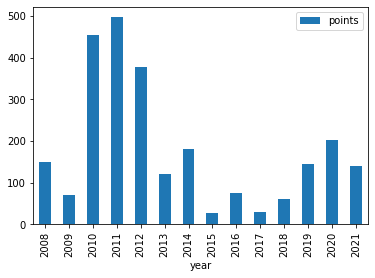

In [23]:
mcl_points = sqlc.sql("""
    SELECT sum(constructor_results.points) AS points, races.year
    FROM constructor_results, races
    WHERE constructorId == 1
        AND races.raceId == constructor_results.raceId
        AND races.year >= 2008
    GROUP BY races.year
    ORDER BY races.year ASC
""")

mcl_points.toPandas() \
    .plot \
    .bar(x = 'year',
             y = 'points')

It's important to note that point awarding changed after 2010, whcih is why we see a very big uptick in the number of points McLaren has scored since. However, we do see a big dip in number of point scored, which has started going back up in the past 3 seasons. The 2021 season is still underway, but we can clearly see that McLaren has already outscored 5 of their past 9 seasons. 

In [25]:
sqlc.sql("""
    SELECT sum(constructor_results.points) AS points, constructors.name, races.year
    FROM constructor_results, races, constructors
    WHERE constructor_results.constructorId == constructors.constructorId
        AND races.raceId == constructor_results.raceId
        AND races.year >= 2010
    GROUP BY constructors.name, races.year
    ORDER BY races.year ASC,  points DESC
""").show()

+------+-----------+----+
|points|       name|year|
+------+-----------+----+
| 498.0|   Red Bull|2010|
| 454.0|    McLaren|2010|
| 396.0|    Ferrari|2010|
| 214.0|   Mercedes|2010|
| 163.0|    Renault|2010|
|  69.0|   Williams|2010|
|  68.0|Force India|2010|
|  44.0|     Sauber|2010|
|  13.0| Toro Rosso|2010|
|   0.0|      Lotus|2010|
|   0.0|        HRT|2010|
|   0.0|     Virgin|2010|
| 650.0|   Red Bull|2011|
| 497.0|    McLaren|2011|
| 375.0|    Ferrari|2011|
| 165.0|   Mercedes|2011|
|  73.0|    Renault|2011|
|  69.0|Force India|2011|
|  44.0|     Sauber|2011|
|  41.0| Toro Rosso|2011|
+------+-----------+----+
only showing top 20 rows



## Pit crew performance 

We can also take a look at how well the team's pit crew was performing over that period. We know that pit stops are an integral part of the race, so it is important to investigate every avenue when looking at where the performance dipped. 

In [26]:
sqlc.sql("""
    SELECT * 
    FROM pit_stops
""").show()

+------+--------+----+---+--------+--------+------------+
|raceId|driverId|stop|lap|    time|duration|milliseconds|
+------+--------+----+---+--------+--------+------------+
|   841|     153|   1|  1|17:05:23|  26.898|       26898|
|   841|      30|   1|  1|17:05:52|  25.021|       25021|
|   841|      17|   1| 11|17:20:48|  23.426|       23426|
|   841|       4|   1| 12|17:22:34|  23.251|       23251|
|   841|      13|   1| 13|17:24:10|  23.842|       23842|
|   841|      22|   1| 13|17:24:29|  23.643|       23643|
|   841|      20|   1| 14|17:25:17|  22.603|       22603|
|   841|     814|   1| 14|17:26:03|  24.863|       24863|
|   841|     816|   1| 14|17:26:50|  25.259|       25259|
|   841|      67|   1| 15|17:27:34|  25.342|       25342|
|   841|       2|   1| 15|17:27:41|  22.994|       22994|
|   841|       1|   1| 16|17:28:24|  23.227|       23227|
|   841|     808|   1| 16|17:28:39|  24.535|       24535|
|   841|       3|   1| 16|17:29:00|  23.716|       23716|
|   841|     1

In [27]:
sqlc.sql("""
    SELECT pit_stops.raceId, pit_stops.driverId, constructors.name, pit_stops.duration, pit_stops.milliseconds, pit_stops.stop, pit_stops.lap
    FROM pit_stops, constructors, results
    WHERE constructors.constructorId == results.constructorId
""").show()

+------+--------+-------+--------+------------+----+---+
|raceId|driverId|   name|duration|milliseconds|stop|lap|
+------+--------+-------+--------+------------+----+---+
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.8

In [28]:
sqlc.sql("""
    SELECT pit_stops.raceId, pit_stops.driverId, duration, pit_stops.milliseconds, stop, lap, results.constructorId
    FROM pit_stops, results, races
    WHERE results.raceId == pit_stops.raceId
""").show()

+------+--------+--------+------------+----+---+-------------+
|raceId|driverId|duration|milliseconds|stop|lap|constructorId|
+------+--------+--------+------------+----+---+-------------+
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|       

In [24]:
sqlc.sql("""
    SELECT concat(drivers.forename, ' ', drivers.surname) AS driver_name, constructors.name, mean(pit_stops.milliseconds)
    FROM results, pit_stops, drivers, constructors, races
    WHERE results.driverId == pit_stops.driverId
        AND drivers.driverId == pit_stops.driverId
        AND constructors.constructorId == results.constructorId
        AND races.raceId == pit_stops.raceId
        AND races.year >= 2008
    GROUP BY driver_name, constructors.name
    ORDER BY driver_name
""").show()

+------------------+--------------+------------------+
|       driver_name|          name|mean(milliseconds)|
+------------------+--------------+------------------+
|      Adrian Sutil|   Force India| 34640.10743801653|
|      Adrian Sutil|        Sauber| 34640.10743801653|
|      Adrian Sutil|        Spyker| 34640.10743801653|
|   Alexander Albon|    Toro Rosso|105626.66666666667|
|   Alexander Albon|      Red Bull|105626.66666666667|
|   Alexander Rossi|Manor Marussia|28321.545454545456|
|Antonio Giovinazzi|    Alfa Romeo|100395.51219512195|
|Antonio Giovinazzi|        Sauber|100395.51219512195|
|   Brendon Hartley|    Toro Rosso| 23993.91176470588|
|       Bruno Senna|           HRT| 23938.55737704918|
|       Bruno Senna|      Williams| 23938.55737704918|
|       Bruno Senna|       Renault| 23938.55737704918|
|      Carlos Sainz|       Ferrari| 81812.75829383887|
|      Carlos Sainz|    Toro Rosso| 81812.75829383887|
|      Carlos Sainz|       McLaren| 81812.75829383887|
|      Car

In [54]:
avg_pit_stops = sqlc.sql("""
    SELECT round(mean(pit_stops.milliseconds), 3) AS avg_pitstop, concat(drivers.forename, ' ', drivers.surname) AS driver_name, constructors.name
    FROM pit_stops, results, drivers, constructors
    WHERE pit_stops.raceId == results.raceId
        AND drivers.driverId == pit_stops.driverId
        AND constructors.constructorId == results.constructorId
    GROUP BY driver_name
""")

avg_pit_stops.createOrReplaceTempView('avg_pit_stops')
avg_pit_stops.show()

AnalysisException: expression 'constructors.`name`' is neither present in the group by, nor is it an aggregate function. Add to group by or wrap in first() (or first_value) if you don't care which value you get.;;
Aggregate [concat(forename#336,  , surname#337)], [round(mean(cast(milliseconds#477 as bigint)), 3) AS avg_pitstop#1592, concat(forename#336,  , surname#337) AS driver_name#1593, name#216]
+- Filter (((raceId#471 = raceId#691) AND (driverId#332 = driverId#472)) AND (constructorId#214 = constructorId#693))
   +- Join Inner
      :- Join Inner
      :  :- Join Inner
      :  :  :- SubqueryAlias pit_stops
      :  :  :  +- Relation[raceId#471,driverId#472,stop#473,lap#474,time#475,duration#476,milliseconds#477] csv
      :  :  +- SubqueryAlias results
      :  :     +- Relation[resultId#690,raceId#691,driverId#692,constructorId#693,number#694,grid#695,position#696,positionText#697,positionOrder#698,points#699,laps#700,time#701,milliseconds#702,fastestLap#703,rank#704,fastestLapTime#705,fastestLapSpeed#706,statusId#707] csv
      :  +- SubqueryAlias drivers
      :     +- Relation[driverId#332,driverRef#333,number#334,code#335,forename#336,surname#337,dob#338,nationality#339,url#340] csv
      +- SubqueryAlias constructors
         +- Relation[constructorId#214,constructorRef#215,name#216,nationality#217,url#218] csv


In [50]:
sqlc.sql("""
    SELECT * 
    FROM avg_pit_stops 
    ORDER BY avg_pitstop ASC
""").show()

+-----------+------------------+------------+
|avg_pitstop|       driver_name|        name|
+-----------+------------------+------------+
|    21962.0| Jérôme d'Ambrosio|    Caterham|
|    21962.0| Jérôme d'Ambrosio|    Lotus F1|
|    21962.0| Jérôme d'Ambrosio|    Marussia|
|  22033.854|Michael Schumacher|    Marussia|
|  22033.854|Michael Schumacher|    Caterham|
|  22033.854|Michael Schumacher|    Lotus F1|
|  22135.591|  Sebastian Vettel|         HRT|
|    22273.0|  Sebastian Vettel|      Virgin|
|    22273.0|  Sebastian Vettel|       Lotus|
|  22283.857|      Nico Rosberg|       Lotus|
|  22283.857|      Nico Rosberg|      Virgin|
|  22386.591|  Jean-Éric Vergne|         HRT|
|    22399.0|     Paul di Resta|Haas F1 Team|
|  22411.157|   Fernando Alonso|         HRT|
|  22460.563|       Mark Webber|         HRT|
|  22494.648|     Jenson Button|      Virgin|
|  22494.648|     Jenson Button|       Lotus|
|  22508.537|     Jenson Button|         HRT|
|  22541.644|Michael Schumacher|  

### Average finishing position at each track

Different tracks suit different cars, so it is interesting to see which tracks McLaren has been doing well in for the past 12 years. 

In [32]:
sqlc.sql("""
    SELECT circuits.name AS track_name, round(mean(position),2) AS avg_finishing_position
    FROM results, races, constructors, drivers, circuits
    WHERE races.raceId == results.raceId
        AND constructors.constructorId == results.constructorId
        AND position IN (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22)
        AND results.constructorId == 1
        AND races.year >= 2008
        AND races.circuitId == circuits.circuitId
    GROUP BY circuits.name
    ORDER BY avg_finishing_position ASC
""").show(20, False)

+------------------------------------+----------------------+-----------+
|track_name                          |avg_finishing_position|count(name)|
+------------------------------------+----------------------+-----------+
|Autodromo Enzo e Dino Ferrari       |6.0                   |3412       |
|Valencia Street Circuit             |6.0                   |5971       |
|Autodromo Internazionale del Mugello|6.0                   |853        |
|Albert Park Grand Prix Circuit      |6.33                  |15354      |
|Buddh International Circuit         |6.6                   |4265       |
|Hungaroring                         |6.68                  |18766      |
|Marina Bay Street Circuit           |6.69                  |13648      |
|Istanbul Park                       |7.0                   |7677       |
|Korean International Circuit        |7.33                  |5118       |
|Hockenheimring                      |7.64                  |9383       |
|Nürburgring                         |

In [33]:
sqlc.sql("""
    SELECT circuits.name AS track_name, round(mean(position),2) AS avg_finishing_position
    FROM results, races, constructors, drivers, circuits
    WHERE races.raceId == results.raceId
        AND constructors.constructorId == results.constructorId
        AND position IN (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22)
        AND results.constructorId == 1
        AND races.year >= 2008
        AND races.circuitId == circuits.circuitId
    GROUP BY circuits.name
    ORDER BY avg_finishing_position DESC
""").show(20, False)

+----------------------------------+----------------------+
|track_name                        |avg_finishing_position|
+----------------------------------+----------------------+
|Fuji Speedway                     |12.0                  |
|Autódromo Hermanos Rodríguez      |11.71                 |
|Sochi Autodrom                    |10.36                 |
|Suzuka Circuit                    |10.2                  |
|Circuit de Nevers Magny-Cours     |10.0                  |
|Silverstone Circuit               |9.71                  |
|Bahrain International Circuit     |9.32                  |
|Circuit Gilles Villeneuve         |9.29                  |
|Autodromo Nazionale di Monza      |9.05                  |
|Circuit Paul Ricard               |9.0                   |
|Baku City Circuit                 |8.56                  |
|Yas Marina Circuit                |8.55                  |
|Autódromo José Carlos Pace        |8.5                   |
|Circuit de Barcelona-Catalunya    |8.38

As we can see, there are only 4 tracks where McLaren have, on average, finished outside the points, two of thos are located in Japan. The data might be slightly biased, since there are tracks that don't feature on the calendar every year. It is interesting however, to see that over the past 10 years, McLaren have not done well in their home race at Silverstone. 

### Different driver performance at McLaren 

We can now take a look at how the different drivers have done over the years at McLaren. 

#### Average qualifying and finishing position

In [82]:
avg_positions = sqlc.sql("""
    SELECT concat(drivers.forename, ' ', drivers.surname) AS driver_name, round(mean(results.position), 2) AS avg_position, round(mean(qualifying.position), 2) AS mean_qualifying
    FROM results, races, drivers, qualifying 
    WHERE results.constructorId == 1
        AND qualifying.constructorId == 1
        AND races.year >= 2008
        AND races.raceId == results.raceId 
        ANd races.raceId == qualifying.raceId
        AND drivers.driverId == results.driverId 
        AND results.driverId == qualifying.driverId
    GROUP BY driver_name
    ORDER BY avg_position ASC
""")
avg_positions.show()

+-----------------+------------+---------------+
|      driver_name|avg_position|mean_qualifying|
+-----------------+------------+---------------+
|   Lewis Hamilton|         4.9|           4.57|
|Heikki Kovalainen|        6.96|           7.29|
|     Carlos Sainz|        7.35|           9.39|
|    Jenson Button|        7.56|           9.34|
|     Lando Norris|        7.76|           8.36|
| Daniel Ricciardo|        8.33|          10.67|
|  Kevin Magnussen|        9.39|            8.6|
|     Sergio Pérez|       10.16|           11.0|
|  Fernando Alonso|       10.87|          13.06|
|Stoffel Vandoorne|       12.12|          15.07|
+-----------------+------------+---------------+



This analysis is unfair to some of the drivers, the two drivers that were in the team during it's worse period are Fernando Alonso, and Stoffel Vandoorne. Which is why they are very low in the rankings. It is important to note that all the drivers have a better average finsihing position than qualifying position, except for lewis Hamilton. This is likely because Lewis already qualified so high, there are not as many places to make up starting from 5th compared to starting from 13th. 

It would also be interesting to see the team's average qualifying position by season:

<AxesSubplot:xlabel='year'>

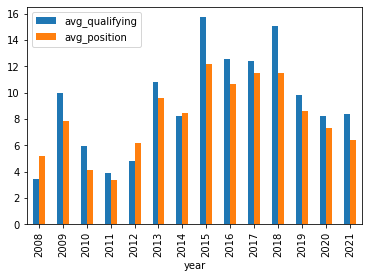

In [90]:
avg_positions_year = sqlc.sql("""
    SELECT races.year, round(mean(qualifying.position), 2) AS avg_qualifying, round(mean(results.position), 2) AS avg_position
    FROM races, qualifying, results
    WHERE races.year >= 2008
        AND qualifying.constructorId == 1
        AND results.constructorId == 1
        AND races.raceId == qualifying.raceId
        AND races.raceId == results.raceId
    GROUP BY races.year
    ORDER BY year ASC
""")

avg_positions_year\
    .toPandas() \
    .plot \
    .bar(x = 'year',
         y = ['avg_qualifying', 'avg_position'])

<AxesSubplot:xlabel='year'>

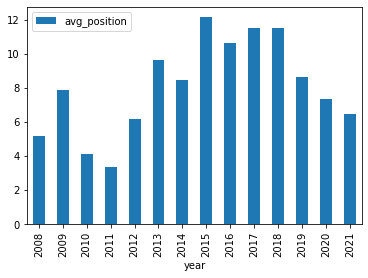

In [85]:
sqlc.sql("""
    SELECT races.year, round(mean(results.position), 2) AS avg_position 
    FROM races, results
    WHERE races.year >= 2008
        AND results.constructorId == 1
        AND races.raceId == results.raceId
    GROUP BY races.year
    ORDER BY year ASC
""") \
    .toPandas() \
    .plot \
    .bar(x = 'year',
         y = 'avg_position')